In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv("D:\SML\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [24]:
df.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
94,95,Female,32,60,42
105,106,Female,21,62,42
38,39,Female,36,37,26


In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
df.shape

(200, 5)

In [27]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [28]:
df.describe(include = object)

,Gender
count,200
unique,2
top,Female
freq,112


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

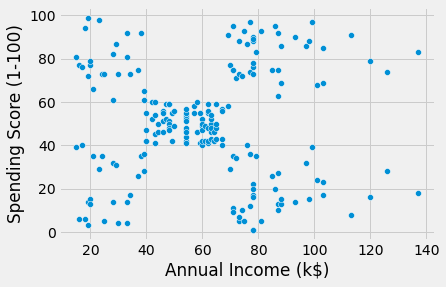

In [29]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [30]:
x = df.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

In [31]:
x

array([[ 39,  15],
       [ 81,  15],
       [  6,  16],
       [ 77,  16],
       [ 40,  17],
       [ 76,  17],
       [  6,  18],
       [ 94,  18],
       [  3,  19],
       [ 72,  19],
       [ 14,  19],
       [ 99,  19],
       [ 15,  20],
       [ 77,  20],
       [ 13,  20],
       [ 79,  20],
       [ 35,  21],
       [ 66,  21],
       [ 29,  23],
       [ 98,  23],
       [ 35,  24],
       [ 73,  24],
       [  5,  25],
       [ 73,  25],
       [ 14,  28],
       [ 82,  28],
       [ 32,  28],
       [ 61,  28],
       [ 31,  29],
       [ 87,  29],
       [  4,  30],
       [ 73,  30],
       [  4,  33],
       [ 92,  33],
       [ 14,  33],
       [ 81,  33],
       [ 17,  34],
       [ 73,  34],
       [ 26,  37],
       [ 75,  37],
       [ 35,  38],
       [ 92,  38],
       [ 36,  39],
       [ 61,  39],
       [ 28,  39],
       [ 65,  39],
       [ 55,  40],
       [ 47,  40],
       [ 42,  40],
       [ 42,  40],
       [ 52,  42],
       [ 60,  42],
       [ 54,

In [32]:
x_df = pd.DataFrame(x)
x_df.head()

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


In [33]:
x_df=pd.DataFrame(x)
x_df.head()

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


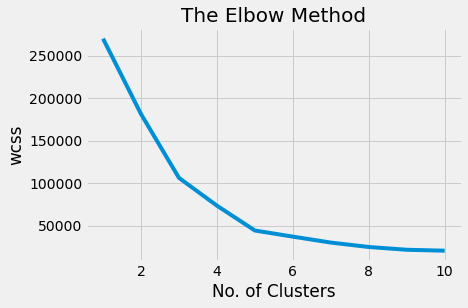

In [34]:
#The Elbow Method to find the No. of Optimal Clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

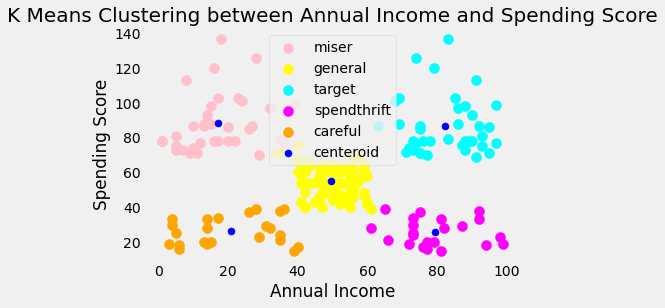

In [35]:
plt.style.use('fivethirtyeight')


km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)


plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')


plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
#plt.legend()
plt.legend(loc='best')
plt.grid()
plt.show()


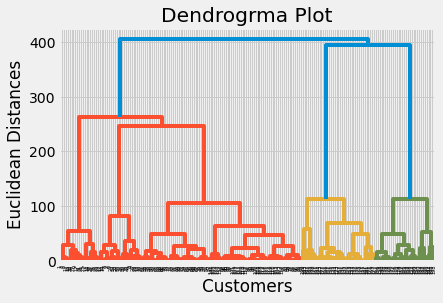

In [36]:

import scipy.cluster.hierarchy as shc  

dendro = shc.dendrogram(shc.linkage(x, method="ward"))  


mtp.title("Dendrogrma Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Customers")  
mtp.show()  

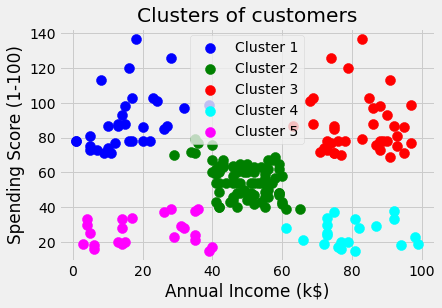

In [37]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  

#visulaizing the clusters  
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
mtp.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
mtp.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()  
